## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, 
                            classification_report, 
                            confusion_matrix)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## Load the dataset

In [2]:
data = pd.read_csv('diabetes.csv')

## Exploratory Data Analysis

Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

In [3]:
#Prints first five column of the data
data.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
#Prints last five column of the data
data.tail(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [5]:
#Counts the no. of rows and columns
data.shape

(768, 9)

Diabetes Dataset has 768 number of rows and 9 columns.

In [6]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Dataset contains 500 row of people with absence of diabetes and 268 row of people with presence of diabetes.

In [7]:
#Prints the summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There is no any null values exists in the dataset.

In [8]:
#Calculating statistical data 
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

From the statistical data, we can see, there is no missing values of inputs, however, the min of columns 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' is '0' which should not be. Therefore, missing values should be imputed that involves replacing the missing values with the mean value of the corresponding column.

In [9]:
#Dropping if there is any duplicates
data = data.drop_duplicates()

In [10]:
#Checks sum of duplicates
data.duplicated().sum()

0

In [11]:
#Displays the dimension of the dataframe
data.shape

(768, 9)

No duplicates as before and after drop, the dataset shape remained same. 

In [12]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no NULL values at first.

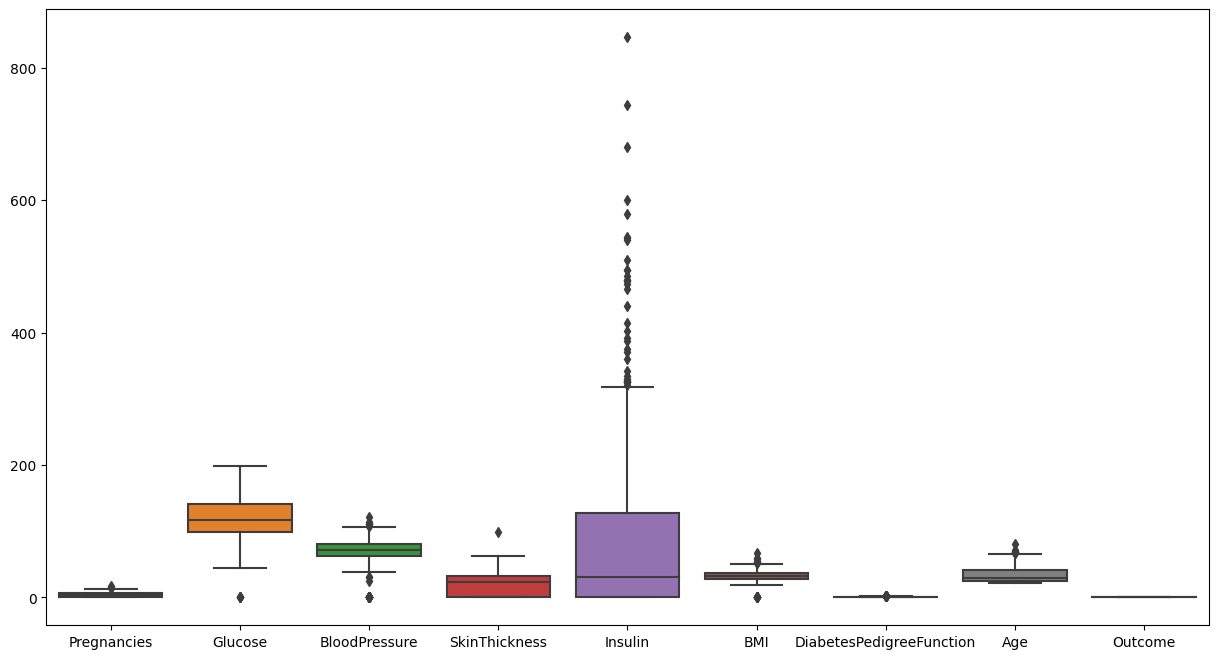

In [13]:
#Box plotting ro analyze outliers
plt.figure(figsize = (15, 8))
sns.boxplot(data = data)
plt.show()

We can observe outliers as shown above in different columns.

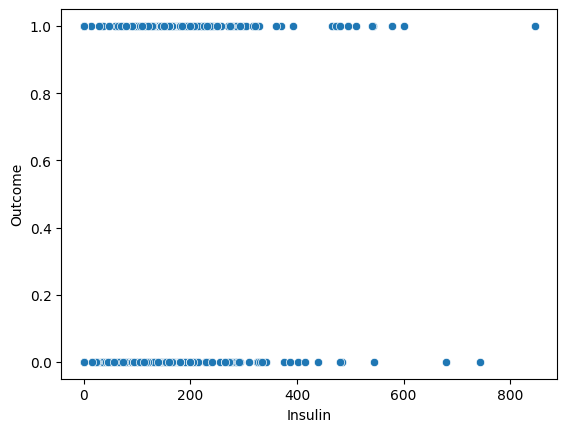

In [14]:
#Scatterplot showing relationship between Outcome and Insulin
sns.scatterplot(x = data['Insulin'], y = data['Outcome'])
plt.show()

Based on the plot above, it is evident that higher insulin levels can be associated with diabetes, but there are also chances where people with high insulin levels do not have diabetes. Hence, it is unnecessary to remove the outliers in the insulin data, as they play a significant role in determining the presence or absence of diabetes.

In [15]:
# rows all, Glucose through BMI (inclusive)
copy_data = data.loc[:, 'Glucose': 'BMI']

In [16]:
#replace with 0
copy_data.replace (0, np.nan, inplace = True)

In [17]:
#assigning copy_data values to actual data
data.loc[:, 'Glucose': 'BMI'] = copy_data

In [18]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

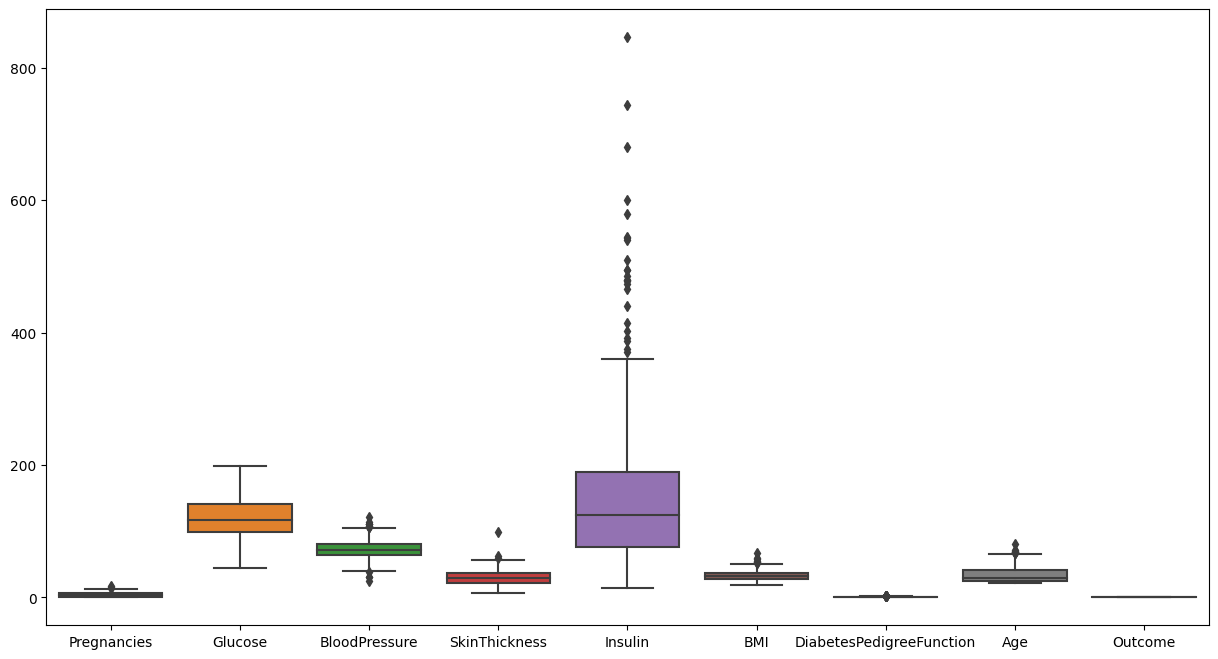

In [19]:
plt.figure(figsize = (15, 8))
sns.boxplot(data = data)
plt.show()

After analyzing the boxplot, it can be observed that the removal of outliers has resulted in a reduction in the number of outliers compared to the previous boxplot image.

In [20]:
#Checking missing values
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

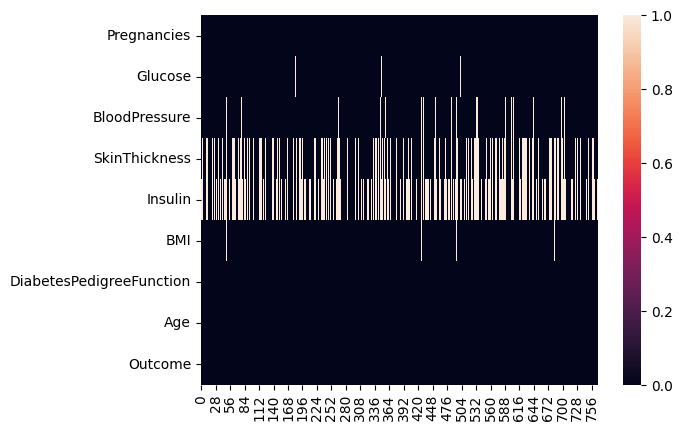

In [21]:
#missing data in percentage for each column
sns.heatmap(data.isna().transpose())
plt.show()

In [22]:
data.isna().sum()/len(data)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

Glucose column has 0.65% missing data, BloodPressure column has 4.55%, missing data, SkinThickness column has 29.55% missing data, Insulin column has 48.69% missing data, and BMI has 1.43% missing data.

In [23]:
#Imputing the rows in which glucose value is null by the mean value of glucose from that column.
data['Glucose'].fillna(data['Glucose'].mean(),inplace=True)

In [24]:
data['BloodPressure'].fillna(data['BloodPressure'].mean(),inplace=True)

In [25]:
data['SkinThickness'].value_counts().head()

32.0    31
30.0    27
27.0    23
23.0    22
28.0    20
Name: SkinThickness, dtype: int64

In [26]:
#Imputing the rows in which SkinThickness value is null by the mean value of SkinThickness from that column.
data['SkinThickness'].fillna(data['SkinThickness'].median(),inplace=True)

In [27]:
data['Insulin'].value_counts().head()

105.0    11
130.0     9
140.0     9
120.0     8
94.0      7
Name: Insulin, dtype: int64

In [28]:
data['Insulin'].fillna(data['Insulin'].median(),inplace=True)

In [29]:
data['BMI'].value_counts().head()

32.0    13
31.6    12
31.2    12
32.4    10
33.3    10
Name: BMI, dtype: int64

In [30]:
data['BMI'].fillna(data['BMI'].median(),inplace=True)

In [31]:
#Data has been cleaned and all the values have been imputed
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.108073  140.671875   
std       3.369578   30.435949      12.096346       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

From the table above, we can see that the previous min values is replaced in corresponding features.

## Data Visualization

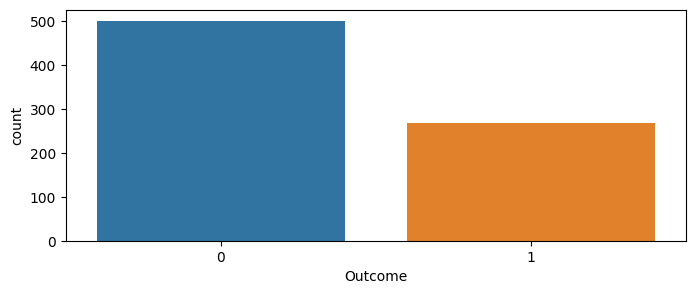

In [33]:
plt.figure(figsize = (8,3))
sns.countplot(x = 'Outcome', data = data)
plt.show()

In [34]:
data['Outcome'].value_counts()/len(data) *100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

0 class has 65.1% and 1 class has 34.8% data. Clearly the given dataset is imbalanced.

In [35]:
fig = px.pie(names = data['Outcome'].value_counts().index, values = data['Outcome'].value_counts().values)
fig.update_layout(width = 600, height = 400)

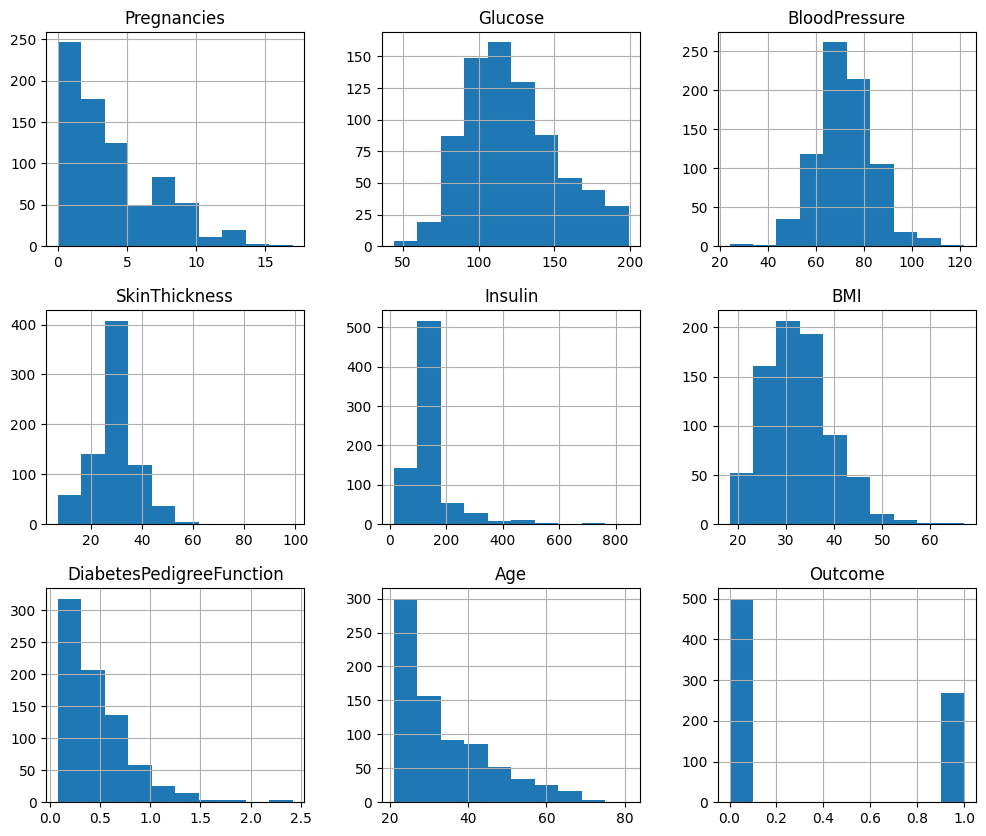

In [36]:
data.hist(figsize = (12, 10), bins= 10)
plt.show()

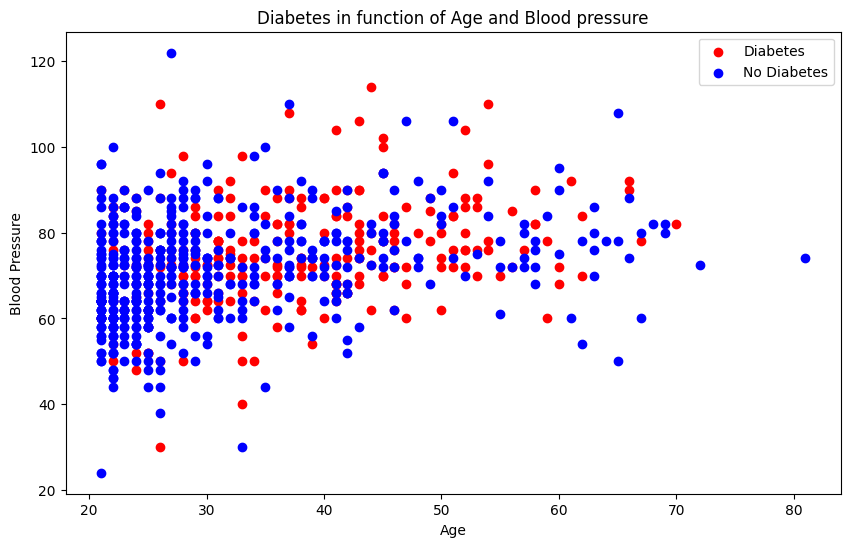

In [37]:
#finding out the Blood Pressure and age of entries who have diabetes
plt.figure(figsize=(10,6))

# Scatter with positive example
plt.scatter(data.Age[data.Outcome==1],data.BloodPressure[data.Outcome==1],c="Red");

# Scatter with negative example
plt.scatter(data.Age[data.Outcome==0],data.BloodPressure[data.Outcome==0],c="blue");

plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);

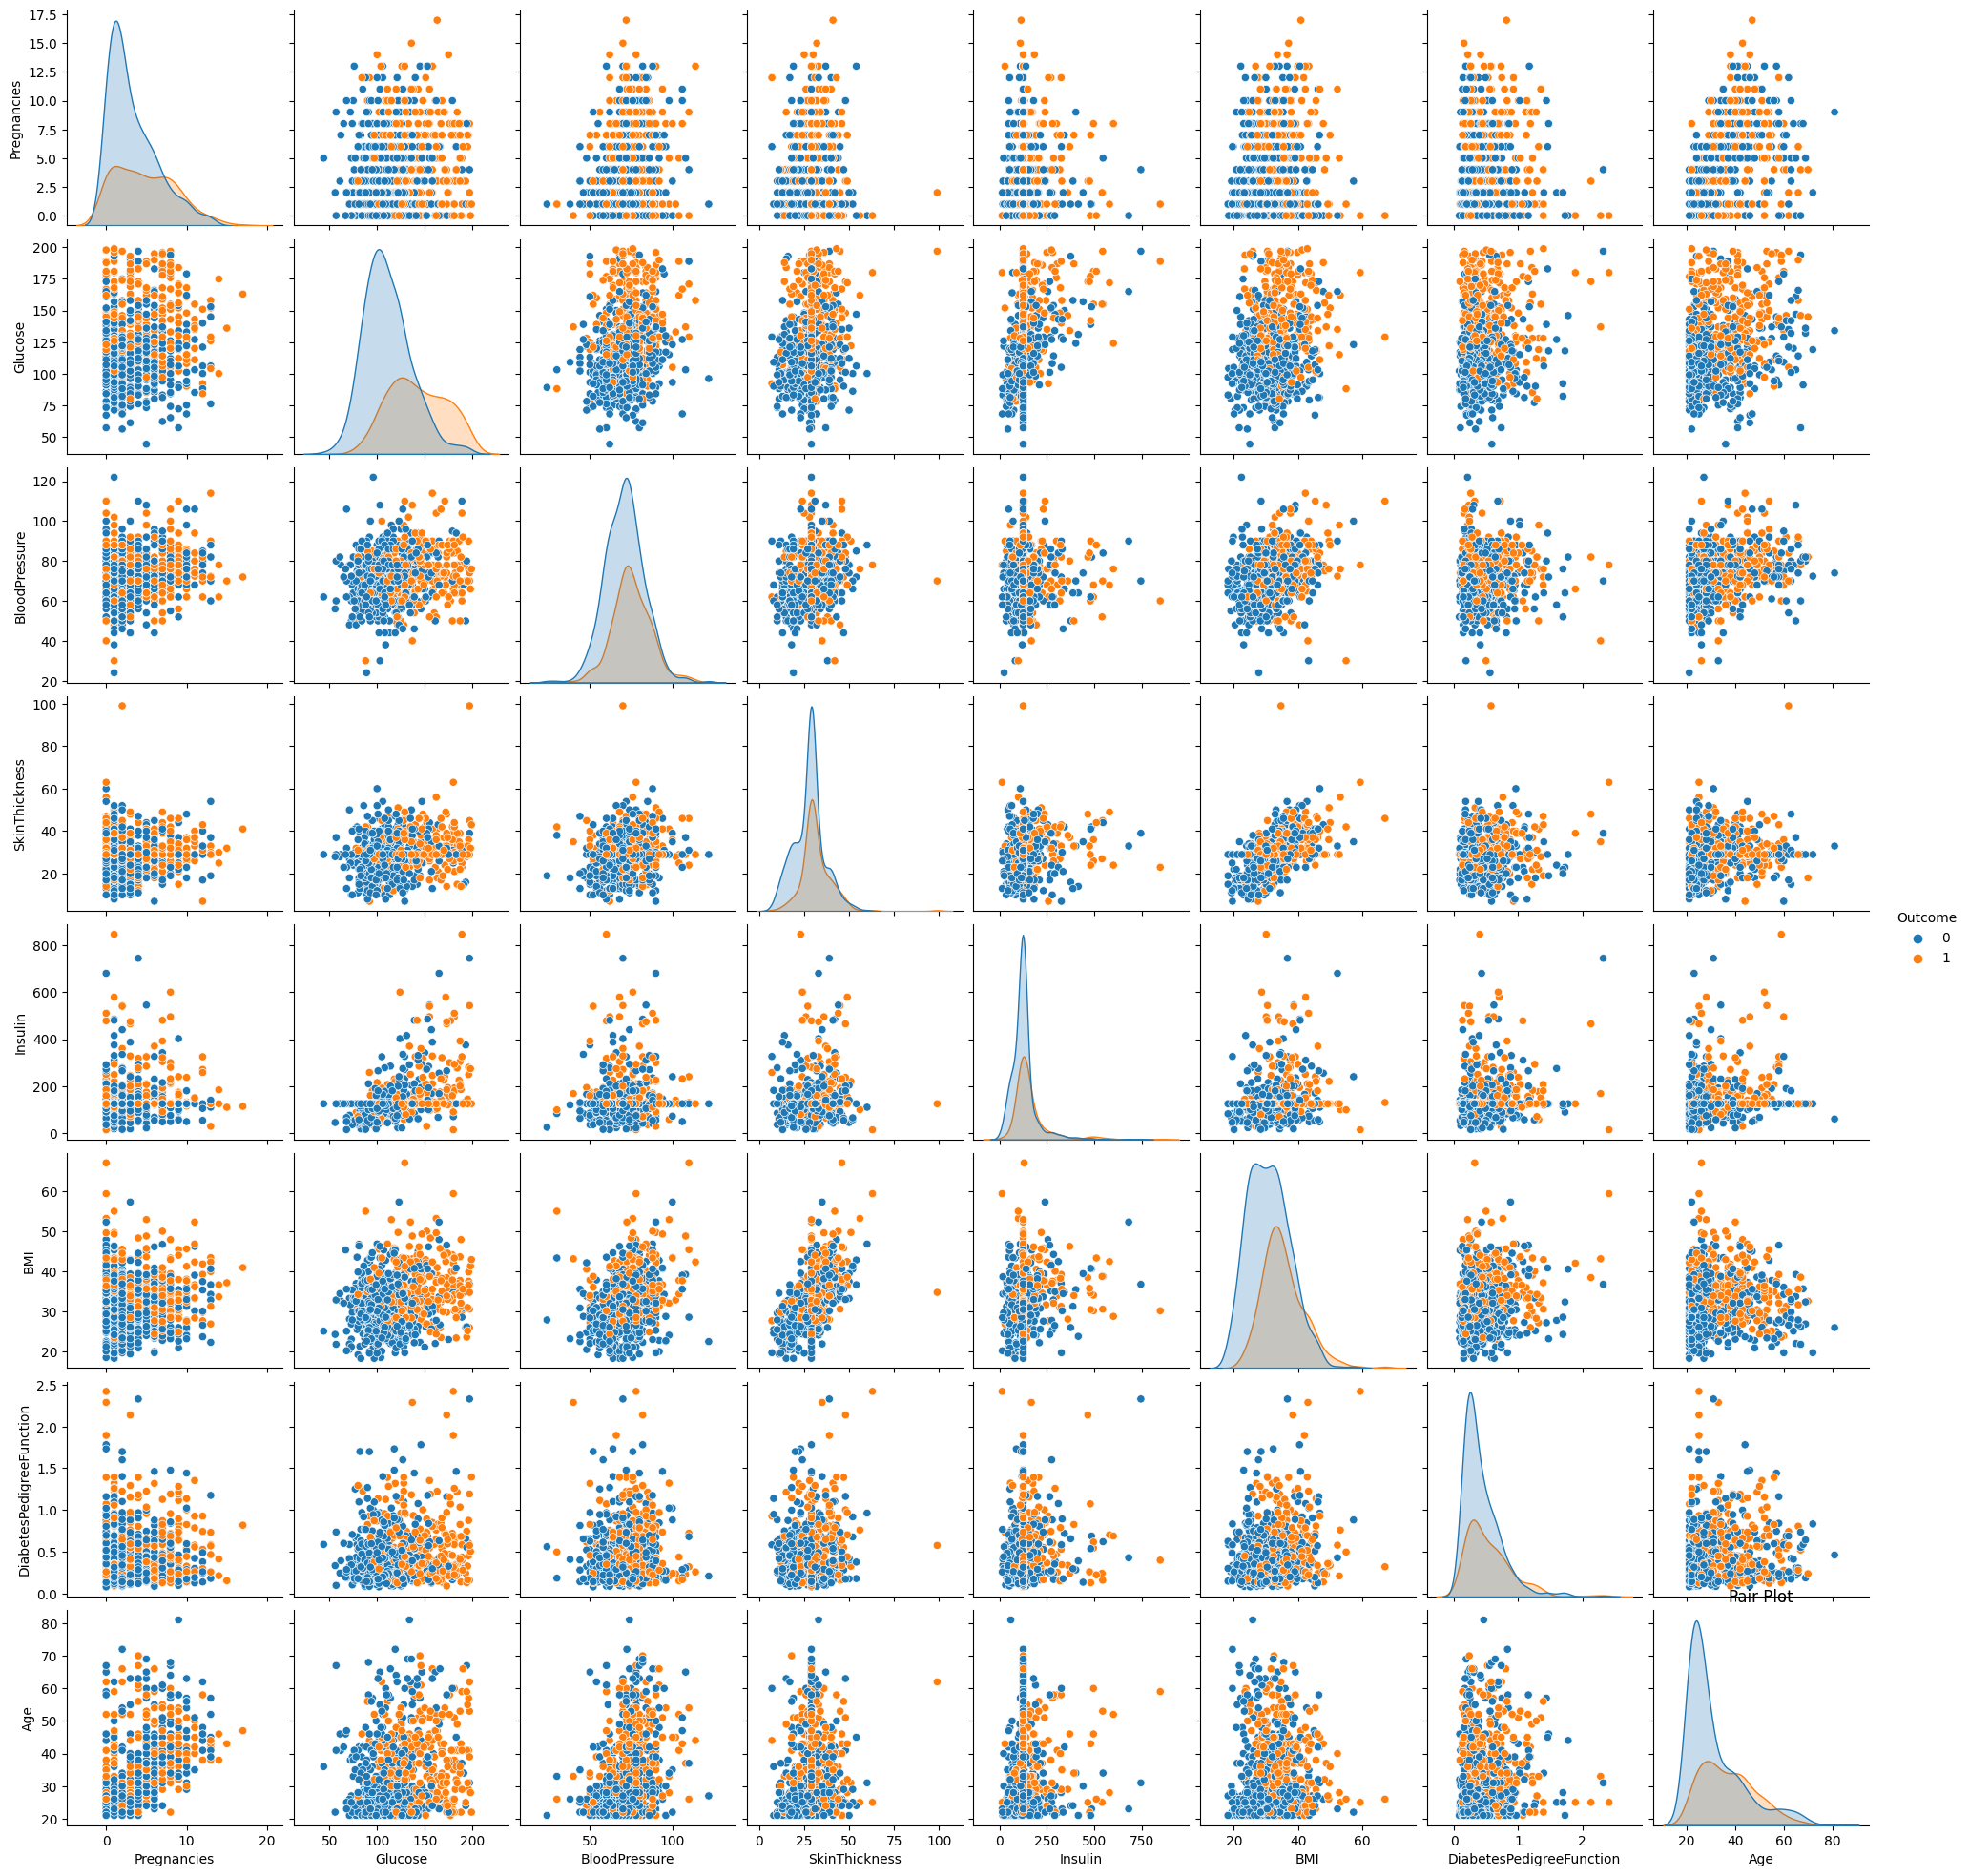

In [38]:
#Pairplot
sns.pairplot(data =data, hue='Outcome')
plt.title('Pair Plot')
plt.show()

In [39]:
data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.081770   
Glucose                      0.127911  1.000000       0.218367       0.192686   
BloodPressure                0.208522  0.218367       1.000000       0.191853   
SkinThickness                0.081770  0.192686       0.191853       1.000000   
Insulin                      0.025047  0.419064       0.045087       0.155610   
BMI                          0.021559  0.231128       0.281199       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.102188   
Age                          0.544341  0.266534       0.324595       0.126107   
Outcome                      0.221898  0.492928       0.166074       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021559                 -0.033523   
Glucose                   0.419064  0.231128                  0.137060   
BloodPressure             0.045087  0.281199                 -0.002763   
SkinThickness             0.155610  0.543205                  0.102188   
Insulin                   1.000000  0.180241                  0.126503   
BMI                       0.180241  1.000000                  0.153438   
DiabetesPedigreeFunction  0.126503  0.153438                  1.000000   
Age                       0.097101  0.025597                  0.033561   
Outcome                   0.203790  0.312038                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266534  0.492928  
BloodPressure             0.324595  0.166074  
SkinThickness             0.126107  0.214873  
Insulin                   0.097101  0.203790  
BMI                       0.025597  0.312038  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

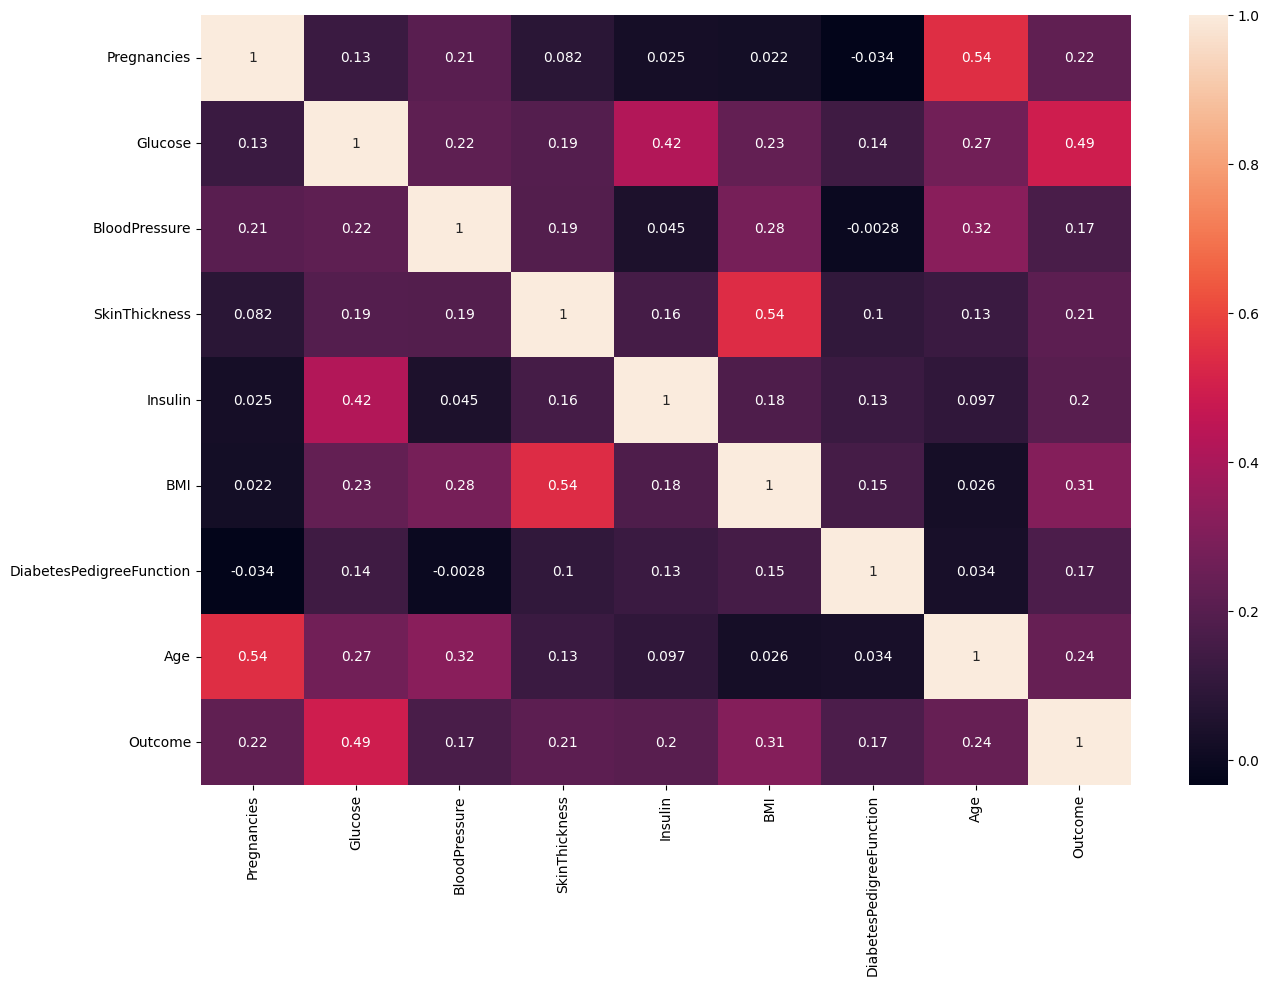

In [40]:
plt.figure(figsize =  (15, 10))
sns.heatmap(data.corr(), annot = True)
plt.show()

Based on the correlation heatmap, we can see that there is a strong relationship between the "Outcome" variable and the features "Pregnancies," "Glucose," "BloodPressure," "Insulin," "BMI," and "Age." Therefore, we can choose these features to take input from the user and make predictions about the outcome that is called Feature selection using correlation value.

## Splitting the data

In [41]:
#Separating the data into features(X) and target(y) and printing their shape

X = data.iloc[:, 0:8] #independent variable
y = data.iloc[:, 8]  #dependent variable

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [42]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [43]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Feature Scaling

In [44]:
#Performing Standardization on the cleaned feature data(X)
sscl=StandardScaler()
X=sscl.fit_transform(X)

## Train-test Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =40)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [46]:
X_train

array([[ 9.36913723e-01,  6.67844298e-01, -1.02619983e+00, ...,
        -5.31999460e-01,  6.49699098e-01,  2.36196069e+00],
       [-5.47918591e-01, -7.45879399e-01, -1.98965170e-01, ...,
        -1.75458243e+00, -7.15394544e-01, -5.31022918e-01],
       [-8.44885053e-01, -1.07465235e+00,  2.97375623e-01, ...,
        -1.82690040e-01, -8.45259647e-01, -8.71373930e-01],
       ...,
       [ 1.82781311e+00, -2.19842674e-01,  1.17557115e-15, ...,
         4.14046886e-01, -1.02042653e+00, -3.60847411e-01],
       [ 3.42980797e-01, -3.18474560e-01, -5.29859033e-01, ...,
         7.77910866e-01, -6.36871459e-01,  6.60205626e-01],
       [-8.44885053e-01,  1.02983926e-02, -6.95305964e-01, ...,
         3.84937768e-01,  6.64799691e-01, -2.75759658e-01]])

In [47]:
y_train

223    0
203    0
112    0
507    0
577    1
      ..
440    1
165    1
7      0
219    1
326    1
Name: Outcome, Length: 614, dtype: int64

## Trying different models

In [48]:
#Logistic Regression

#Creating Logistic model and training it
log_model = LogisticRegression(max_iter=5000)  # without max_iter = ConvergenceWarning
log_model.fit(X_train, y_train)

#Making predictions on the test set
log_pred = log_model.predict(X_test)

In [50]:
log_train_accuracy = log_model.score(X_train, y_train)*100
print(f'Train accuracy of Logistic Regression: {log_train_accuracy}')

log_test_accuracy = log_model.score(X_train, y_train)*100
print(f'Test accuracy of Logistic Regression: {log_test_accuracy}')


log_accuracy = accuracy_score(y_test,log_pred)*100
print(f'Accuracy of Loistic Regression: {log_accuracy}')

Train accuracy of Logistic Regression: 77.0358306188925
Test accuracy of Logistic Regression: 77.0358306188925
Accuracy of Loistic Regression: 77.92207792207793


In [58]:
# Confusion Matrix of Logistic Reression

cm = confusion_matrix(y_true = y_test, y_pred = log_pred)
cm

array([[87,  8],
       [26, 33]], dtype=int64)

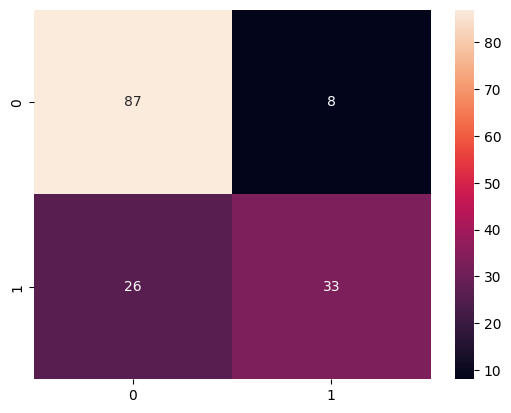

In [59]:
sns.heatmap(confusion_matrix(y_test, log_pred), annot=True)
plt.show()

From the confusion matrix;
- There were 87 data which value were negative and our model predict true means **True Negative**.
- There were 8 data which value were positive and our model predict false means **False Positive**.
- There were 26 data which value were negative and our model predict false means **False Negative**.
- There were 33 data which value were positive and our model predict true means **True Positive**.
   

In [51]:
print(classification_report(y_true = y_test, y_pred = log_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        95
           1       0.80      0.56      0.66        59

    accuracy                           0.78       154
   macro avg       0.79      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [52]:
#SVM

#Creating SVM model and training it
svm_model = SVC()  
svm_model.fit(X_train, y_train)

#Making prediciton in the test set
svm_pred = svm_model.predict(X_test)

In [53]:
#Evaluation

svm_train_accuracy = svm_model.score(X_train, y_train)*100
print(f'Train accuracy of Support Vector Machine: {svm_train_accuracy}')

svm_test_accuracy = svm_model.score(X_train, y_train)*100
print(f'Test accuracy of Support Vector Machine: {svm_test_accuracy}')


svm_accuracy = accuracy_score(y_test,svm_pred)*100
print(f'Accuracy of Support Vector Machine: {svm_accuracy}')


Train accuracy of Support Vector Machine: 82.24755700325733
Test accuracy of Support Vector Machine: 82.24755700325733
Accuracy of Support Vector Machine: 74.02597402597402


In [ ]:
# Confusion Matrix of Suppport Vector Machine

cm = confusion_matrix(y_true = y_test, y_pred = svm_pred)
cm

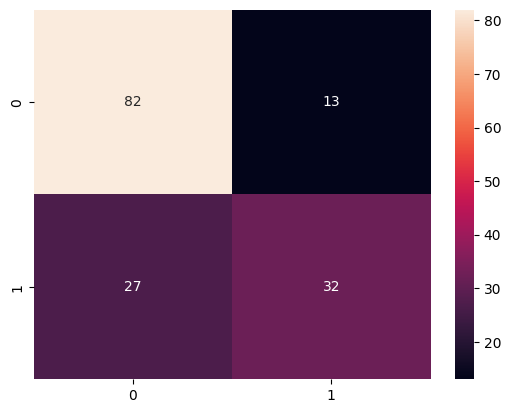

In [62]:
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True)
plt.show()

From the confusion matrix;
- There were 82 data which value were negative and our model predict true means **True Negative**.
- There were 13 data which value were positive and our model predict false means **False Positive**.
- There were 27 data which value were negative and our model predict false means **False Negative**.
- There were 32 data which value were positive and our model predict true means **True Positive**.

In [54]:
print(classification_report(y_true = y_test, y_pred = svm_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        95
           1       0.71      0.54      0.62        59

    accuracy                           0.74       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.74      0.74      0.73       154



In [55]:
#Naive-Bayes Classifier

#Creating Naive-Bayes model and training it
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

#Making prediciton in the test set
nb_pred = nb_model.predict(X_test)

In [56]:
#Evaluation

nb_train_accuracy = nb_model.score(X_train, y_train)*100
print(f'Train accuracy of Naive-Bayes: {nb_train_accuracy}')

nb_test_accuracy = nb_model.score(X_train, y_train)*100
print(f'Test accuracy of Naive-Bayes: {nb_test_accuracy}')

nb_accuracy = accuracy_score(y_test,nb_pred)*100
print(f'Accuracy of Naive-Bayes: {nb_accuracy}')

Train accuracy of Naive-Bayes: 76.38436482084691
Test accuracy of Naive-Bayes: 76.38436482084691
Accuracy of Naive-Bayes: 71.42857142857143


In [63]:
# Confusion Matrix of Naive-Bayes

cm = confusion_matrix(y_true = y_test, y_pred = nb_pred)
cm

array([[76, 19],
       [25, 34]], dtype=int64)

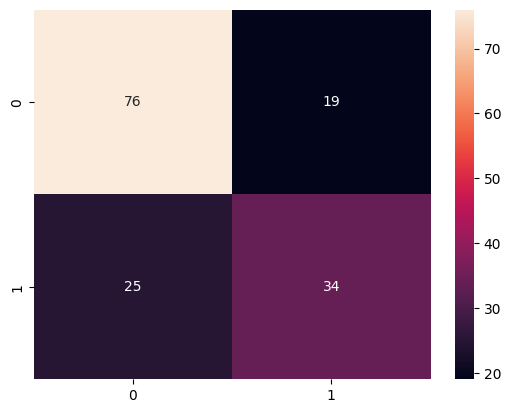

In [65]:
sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True)
plt.show()

From the confusion matrix;
- There were 76 data which value were negative and our model predict true means **True Negative**.
- There were 19 data which value were positive and our model predict false means **False Positive**.
- There were 25 data which value were negative and our model predict false means **False Negative**.
- There were 34 data which value were positive and our model predict true means **True Positive**.

In [57]:
print(classification_report(y_true = y_test, y_pred = nb_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78        95
           1       0.64      0.58      0.61        59

    accuracy                           0.71       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



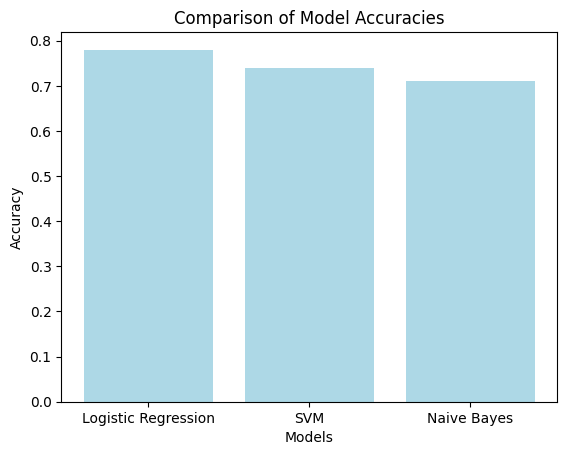

In [68]:
model_compare = ['Logistic Regression', 'SVM', 'Naive Bayes']
accuracies = [0.78, 0.74, 0.71]

plt.bar(model_compare, accuracies, color='lightblue')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

From above results, among all three used models,Logistic Regression have predicted with high accuracy rate 78%.